In [ ]:
###########################################################################
# I would like to acknowledge the authors of these task and images.
# Kaggle problem: https://www.kaggle.com/andrewmvd/face-mask-detection
# Source of the data: https://makeml.app/datasets/mask
###########################################################################

In [3]:
import pandas as pd
!pip install bs4
from bs4 import BeautifulSoup as bs
!pip install lxml

In [8]:
import os, sys
path ="C:/Users/vigne/OneDrive/Desktop/adv_ds_project/annotations/"
dirs = os.listdir(path)
img_files = []

#Gather all .xml file paths
for file in dirs:
    img_files.append(path+file)

In [9]:
### Parsing ###

img_dim=[]
bndbox_dim=[]
class_str=[]
filename=[]
for each in img_files:
    file = open(each)
    page = file.read()
    soup = bs(page, "xml")
    
    faces = soup.findAll('object')
    for face in faces:
    
        #append filename
        filename.append(each)
    
        #parse image dim
        size = soup.find('size')
        width = int(size.find('width').text)
        height = int(size.find('height').text)
        img_dim.append([width,height])
    
        #parse class string -> class name
        cat = face.find('name').text
        class_str.append(cat)
        
        #parse bndbox range
        box=face.find('bndbox')
        xmin = int(box.find('xmin').text)
        xmax = int(box.find('xmax').text)
        ymin = int(box.find('ymin').text)
        ymax = int(box.find('ymax').text)
        
        # format -> xmin xmax ymin ymax
        bndbox_dim.append([xmin,xmax,ymin,ymax])

In [10]:
# Check data
print(img_dim[0:5])

[[512, 366], [512, 366], [512, 366], [400, 156], [400, 156]]


In [11]:
# Check data
print(bndbox_dim[0:5])

[[79, 109, 105, 142], [185, 226, 100, 144], [325, 360, 90, 141], [321, 354, 34, 69], [224, 261, 38, 73]]


In [12]:
# Check data
print(class_str[0:5])

['without_mask', 'with_mask', 'without_mask', 'with_mask', 'with_mask']


In [13]:
# Check data
print(filename[0:5])

['C:/Users/vigne/OneDrive/Desktop/adv_ds_project/annotations/maksssksksss0.xml', 'C:/Users/vigne/OneDrive/Desktop/adv_ds_project/annotations/maksssksksss0.xml', 'C:/Users/vigne/OneDrive/Desktop/adv_ds_project/annotations/maksssksksss0.xml', 'C:/Users/vigne/OneDrive/Desktop/adv_ds_project/annotations/maksssksksss1.xml', 'C:/Users/vigne/OneDrive/Desktop/adv_ds_project/annotations/maksssksksss1.xml']


In [14]:
# Combine all individual lists to one list
data_table = [filename,img_dim,bndbox_dim,class_str]

#Create a dataframe using pandas
df = pd.DataFrame(data_table)
#Add column headers
df = df.transpose()
headers = ['Filename','ImgDim','Bndbox','ClassStr']
df.columns = headers
df.head()

,Filename,ImgDim,Bndbox,ClassStr
0,C:/Users/vigne/OneDrive/Desktop/adv_ds_project...,"[512, 366]","[79, 109, 105, 142]",without_mask
1,C:/Users/vigne/OneDrive/Desktop/adv_ds_project...,"[512, 366]","[185, 226, 100, 144]",with_mask
2,C:/Users/vigne/OneDrive/Desktop/adv_ds_project...,"[512, 366]","[325, 360, 90, 141]",without_mask
3,C:/Users/vigne/OneDrive/Desktop/adv_ds_project...,"[400, 156]","[321, 354, 34, 69]",with_mask
4,C:/Users/vigne/OneDrive/Desktop/adv_ds_project...,"[400, 156]","[224, 261, 38, 73]",with_mask


In [15]:
#Save the dataframe to a csv file
df.to_csv(r"C:\Users\vigne\OneDrive\Desktop\adv_ds_project\data_table.csv")

In [16]:
# Explore number of faces per image
df1=df.groupby('Filename').count()
df1.head(15)

,ImgDim,Bndbox,ClassStr
Filename,,,
C:/Users/vigne/OneDrive/Desktop/adv_ds_project/annotations/maksssksksss0.xml,3,3,3
C:/Users/vigne/OneDrive/Desktop/adv_ds_project/annotations/maksssksksss1.xml,9,9,9
C:/Users/vigne/OneDrive/Desktop/adv_ds_project/annotations/maksssksksss10.xml,1,1,1
C:/Users/vigne/OneDrive/Desktop/adv_ds_project/annotations/maksssksksss100.xml,3,3,3
C:/Users/vigne/OneDrive/Desktop/adv_ds_project/annotations/maksssksksss101.xml,1,1,1
C:/Users/vigne/OneDrive/Desktop/adv_ds_project/annotations/maksssksksss102.xml,1,1,1
C:/Users/vigne/OneDrive/Desktop/adv_ds_project/annotations/maksssksksss103.xml,4,4,4
C:/Users/vigne/OneDrive/Desktop/adv_ds_project/annotations/maksssksksss104.xml,8,8,8
C:/Users/vigne/OneDrive/Desktop/adv_ds_project/annotations/maksssksksss105.xml,9,9,9


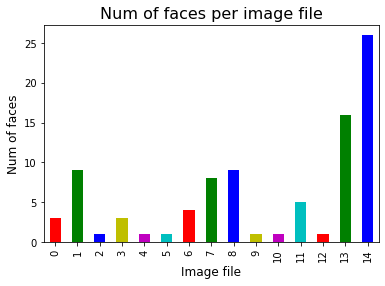

In [26]:
# Plot graph for number of faces per image for first 15 images
import matplotlib as mpl
import matplotlib.pyplot as plt

df1 = df1.reset_index()
ax = df1['ImgDim'][0:15].plot(kind = 'bar',color = ['r','g','b','y','m','c'])
ax.set_title("Num of faces per image file", fontsize=16)
ax.set_ylabel("Num of faces", fontsize=12);
ax.set_xlabel("Image file", fontsize=12);
plt.show()




In [18]:
# Explore the number of faces per class
df2=df.groupby('ClassStr').count()
df2.head()

,Filename,ImgDim,Bndbox
ClassStr,,,
mask_weared_incorrect,123,123,123
with_mask,3232,3232,3232
without_mask,717,717,717


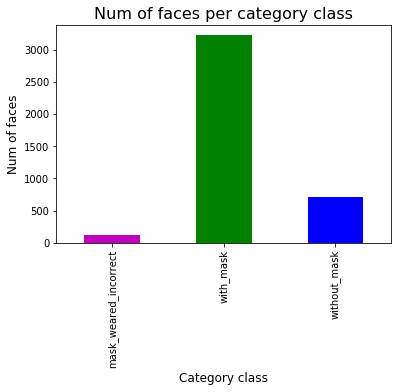

In [25]:
ax = df2['ImgDim'].plot(kind = 'bar', color = ['m','g','b'])
ax.set_title("Num of faces per category class", fontsize=16)
ax.set_ylabel("Num of faces", fontsize=12);
ax.set_xlabel("Category class", fontsize=12);
plt.show()
